Data Analytics de empresa de Telecomunicaciones.
Analisís exploratorio de los datos recopilados(EDA)

Importación de librerias a utilizar

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [3]:
# Manejo de mensajes warnings
warnings.filterwarnings('ignore')

Ingesta de archivos con respectivas hojas para posterior análisis.

In [4]:
# Definir las rutas de los archivos y las hojas específicas que se quieren leer
archivos_hojas = {
    r'C:\Users\walter\Desktop\Data_Analytics\Datasets\Internet.xlsx': [
        'Penetracion-Total','Totales de Accesos Por Tegnologia','Ingresos','Totales VMD'
    ]
   
   
 
}

# Diccionario para almacenar los dataframes seleccionados
dataframes_seleccionados = {}

# Leer y seleccionar las hojas deseadas de cada archivo Excel
for ruta, hojas in archivos_hojas.items():
    try:
        # Leer los nombres de las hojas en el archivo
        nombres_hojas = pd.ExcelFile(ruta).sheet_names
        print(f"Hojas en el archivo {ruta}: {nombres_hojas}")
        
        # Verificar si las hojas especificadas están presentes
        hojas_validas = [hoja for hoja in hojas if hoja in nombres_hojas]
        if not hojas_validas:
            print(f"No se encontraron las hojas especificadas en el archivo {ruta}")
            continue
        
        # Leer las hojas válidas
        hojas_dataframes = pd.read_excel(ruta, sheet_name=hojas_validas)
        dataframes_seleccionados.update(hojas_dataframes)
    except Exception as e:
        print(f"Error al leer el archivo {ruta}: {e}")






Error al leer el archivo C:\Users\walter\Desktop\Data_Analytics\Datasets\Internet.xlsx: Excel file format cannot be determined, you must specify an engine manually.


In [12]:
# Ruta al archivo XLSX
archivo_xlsx = r'C:\Users\walter\Desktop\Data_Analytics\Datasets\Internet (1).xlsx'

# Lista de nombres de las hojas 
hojas = ['Penetración-poblacion', 'Penetracion-hogares', 'Totales Accesos Por Tecnología', 'Accesos por velocidad', 'Ingresos']

# Leer cada hoja en un DataFrame y almacenarlos en una lista, especificando el nombre de la hoja
dataframes_seleccionados = [pd.read_excel(archivo_xlsx, sheet_name=hoja, engine='openpyxl') for hoja in hojas]

# Concatenar los DataFrames
df_consolidado = pd.concat(dataframes_seleccionados)

# Imprimir el DataFrame Consolidado
print(df_consolidado)


     Año  Trimestre        Provincia  Accesos por cada 100 hab  \
0   2023          4     Buenos Aires                     27.68   
1   2023          4  Capital Federal                     47.80   
2   2023          4        Catamarca                     17.46   
3   2023          4            Chaco                     11.85   
4   2023          4           Chubut                     26.04   
..   ...        ...              ...                       ...   
35  2015          1              NaN                       NaN   
36  2014          4              NaN                       NaN   
37  2014          3              NaN                       NaN   
38  2014          2              NaN                       NaN   
39  2014          1              NaN                       NaN   

    Accesos por cada 100 hogares  ADSL  Cablemodem  Fibra óptica  Wireless  \
0                            NaN   NaN         NaN           NaN       NaN   
1                            NaN   NaN         NaN 

Identificación y manejos de valores faltantes(nulos)

In [13]:
total_nulos = df_consolidado.isnull().sum().sum()
print("Total de valores nulos en el DataFrame:", total_nulos)


Total de valores nulos en el DataFrame: 42446


In [14]:
filas_con_nulos = df_consolidado[df_consolidado.isnull().any(axis=1)]
print("Filas con valores nulos:")
print(filas_con_nulos)


Filas con valores nulos:
     Año  Trimestre        Provincia  Accesos por cada 100 hab  \
0   2023          4     Buenos Aires                     27.68   
1   2023          4  Capital Federal                     47.80   
2   2023          4        Catamarca                     17.46   
3   2023          4            Chaco                     11.85   
4   2023          4           Chubut                     26.04   
..   ...        ...              ...                       ...   
35  2015          1              NaN                       NaN   
36  2014          4              NaN                       NaN   
37  2014          3              NaN                       NaN   
38  2014          2              NaN                       NaN   
39  2014          1              NaN                       NaN   

    Accesos por cada 100 hogares  ADSL  Cablemodem  Fibra óptica  Wireless  \
0                            NaN   NaN         NaN           NaN       NaN   
1                         

Verificación de registros duplicados.

In [15]:
#Identificar filas duplicadas
duplicados = df_consolidado.duplicated()
print("Filas duplicadas :")

Filas duplicadas :


Visualización de valores outliers ya que su existencia van a distorcionar el análisis estadístico
Utilizando el rango Intercuartílico(IQR)

In [16]:
# Calcular el IQR para cada columna numérica
for column in df_consolidado.select_dtypes(include=[np.number]).columns:
    Q1 = df_consolidado[column].quantile(0.25)
    Q3 = df_consolidado[column].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf= Q1 - 1.5 * IQR 
    lim_sup = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers = df_consolidado[(df_consolidado[column] < lim_inf) | (df_consolidado[column] > lim_sup)]
    
    print(f'Columna: {column}')
    print(f'Outliers encontrados: {len(outliers)}')
    print(outliers.head())  # Muestra los primeros outliers encontrados
    print()

Columna: Año
Outliers encontrados: 1
    Año  Trimestre Provincia  Accesos por cada 100 hab  \
3  2033          1       NaN                       NaN   

   Accesos por cada 100 hogares  ADSL  Cablemodem  Fibra óptica  Wireless  \
3                           NaN   NaN         NaN           NaN       NaN   

   Otros  ...       Periodo HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
3    NaN  ...  Ene-Mar 2023            NaN                  NaN   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
3                NaN                 NaN                  NaN   

   + 20 Mbps - 30 Mbps  + 30 Mbps  OTROS  Ingresos (miles de pesos)  
3                  NaN        NaN    NaN               1.041350e+08  

[1 rows x 21 columns]

Columna: Trimestre
Outliers encontrados: 0
Empty DataFrame
Columns: [Año, Trimestre, Provincia, Accesos por cada 100 hab, Accesos por cada 100 hogares, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total, Periodo, HASTA 512 kbps, + 512 Kbps - 1 Mbps, + 1 Mbp

Visualizando datos

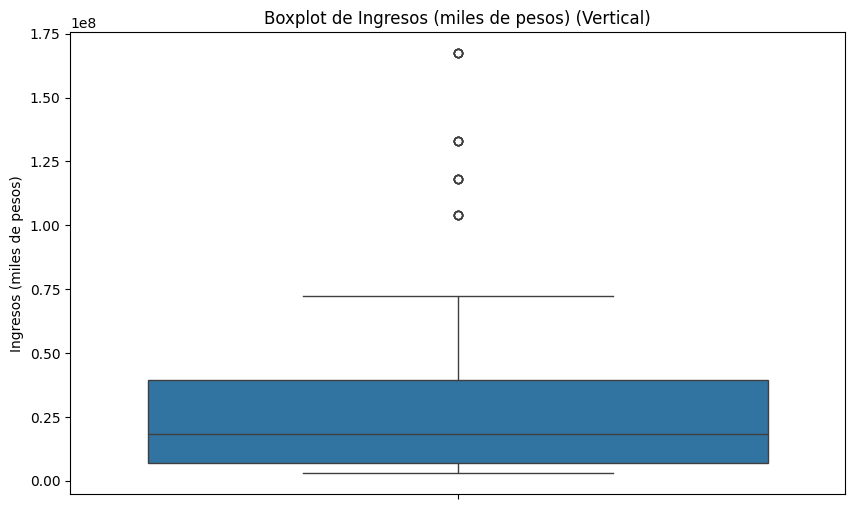

In [20]:
 # Boxplot vertical
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_consolidado[column])
plt.title(f'Boxplot de {column} (Vertical)')
plt.ylabel(column)
plt.show()

Visualizando distribución de outliers

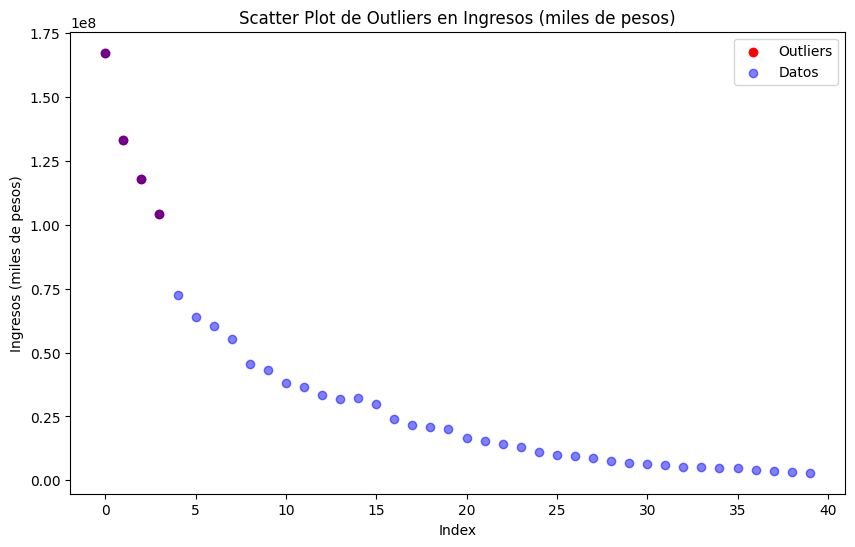

In [19]:
    # Scatter plot para los outliers
plt.figure(figsize=(10, 6))
plt.scatter(x=outliers.index, y=outliers[column], color='red', label='Outliers')
plt.scatter(x=df_consolidado.index, y=df_consolidado[column], color='blue', alpha=0.5, label='Datos')
plt.title(f'Scatter Plot de Outliers en {column}')
plt.xlabel('Index')
plt.ylabel(column)
plt.legend()
plt.show()

Finalmente, creamos visualizaciones para explorar las relaciones entre las variables y derivar conclusiones.Se utilizan gráficos, histogramas para variable cuantitativa , y gráficos de barras para ver frcuencia de variable cualitativa.


In [21]:
# Obtener nombres de columnas numéricas (cuantitativas)
columnas_cuantitativas = df_consolidado.select_dtypes(include=[np.number]).columns.tolist()

# Obtener nombres de columnas categóricas (cualitativas)
columnas_cualitativas = df_consolidado.select_dtypes(exclude=[np.number]).columns.tolist()

print("Columnas Cuantitativas:")
print(columnas_cuantitativas)

print("\nColumnas Cualitativas:")
print(columnas_cualitativas)

Columnas Cuantitativas:
['Año', 'Trimestre', 'Accesos por cada 100 hab', 'Accesos por cada 100 hogares', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Ingresos (miles de pesos)']

Columnas Cualitativas:
['Provincia', 'Periodo']


In [23]:
# Mostrar las primeras filas de las columnas cuantitativas
print("Variables Cuantitativas:")
print(df_consolidado[columnas_cuantitativas].head())


Variables Cuantitativas:
    Año  Trimestre  Accesos por cada 100 hab  Accesos por cada 100 hogares  \
0  2023          4                     27.68                           NaN   
1  2023          4                     47.80                           NaN   
2  2023          4                     17.46                           NaN   
3  2023          4                     11.85                           NaN   
4  2023          4                     26.04                           NaN   

   ADSL  Cablemodem  Fibra óptica  Wireless  Otros  Total  HASTA 512 kbps  \
0   NaN         NaN           NaN       NaN    NaN    NaN             NaN   
1   NaN         NaN           NaN       NaN    NaN    NaN             NaN   
2   NaN         NaN           NaN       NaN    NaN    NaN             NaN   
3   NaN         NaN           NaN       NaN    NaN    NaN             NaN   
4   NaN         NaN           NaN       NaN    NaN    NaN             NaN   

   + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  

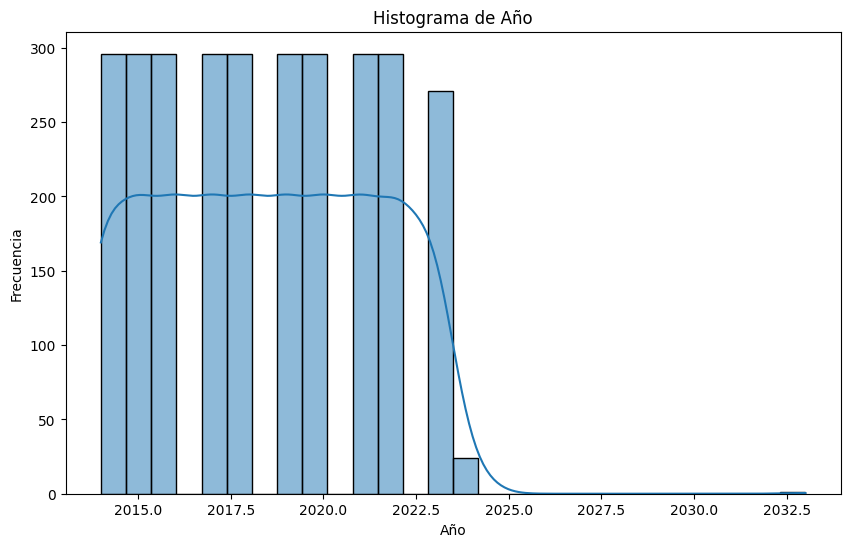

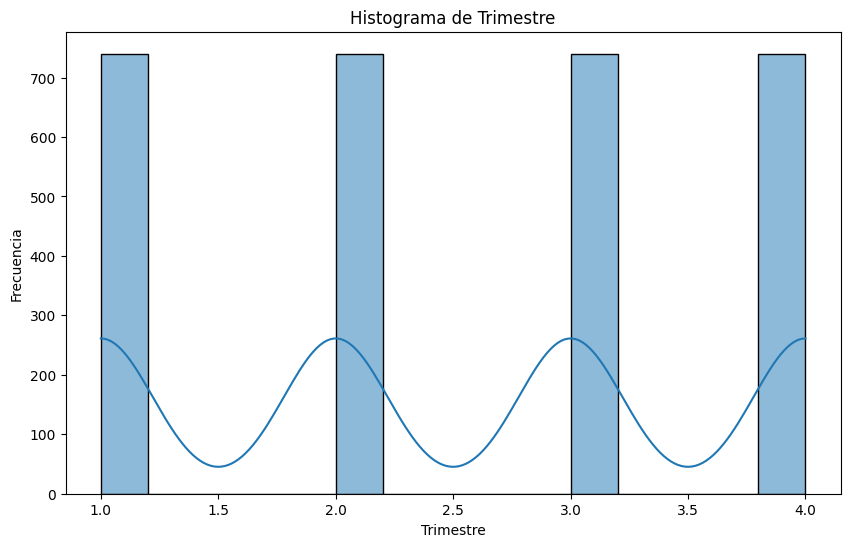

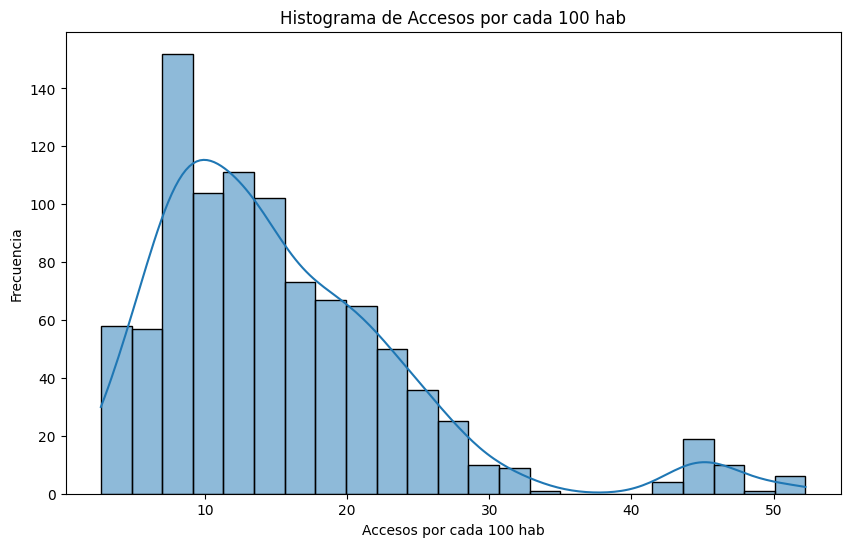

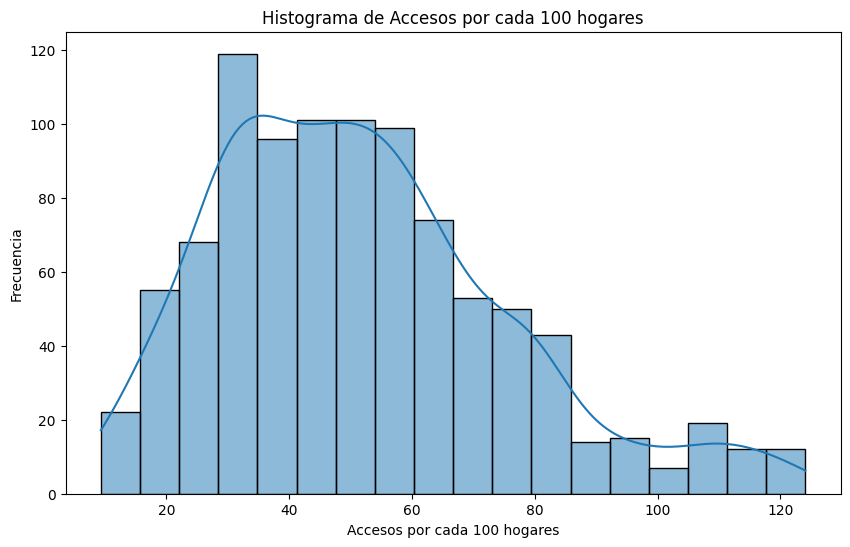

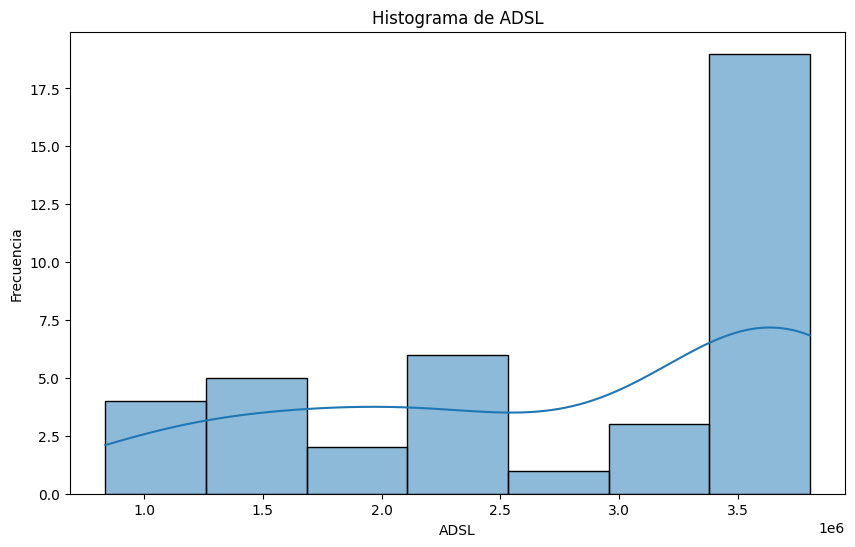

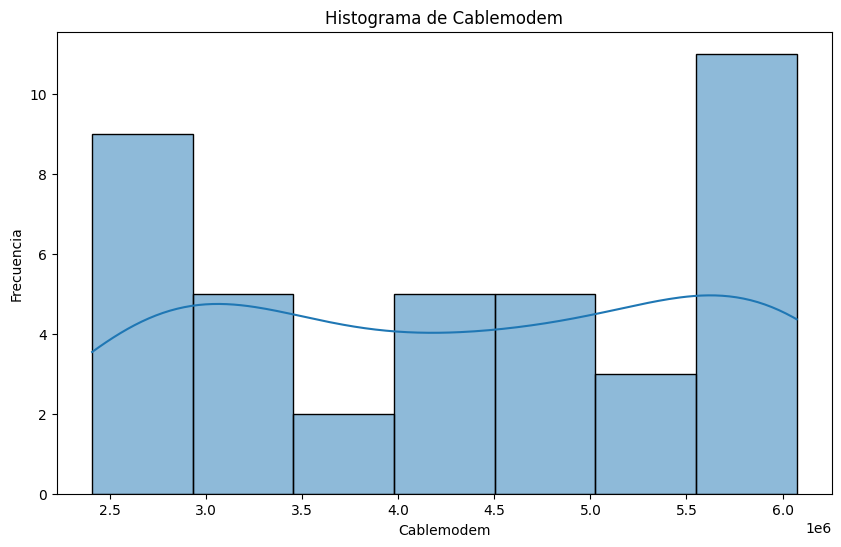

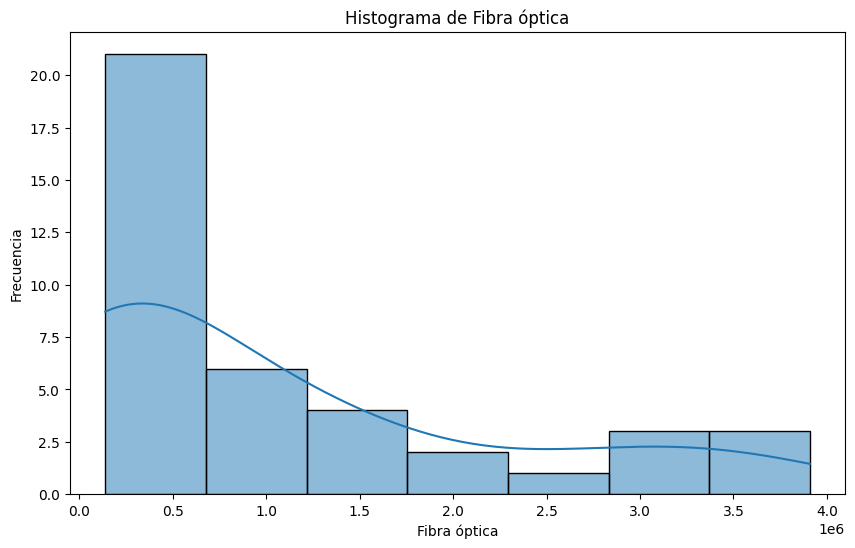

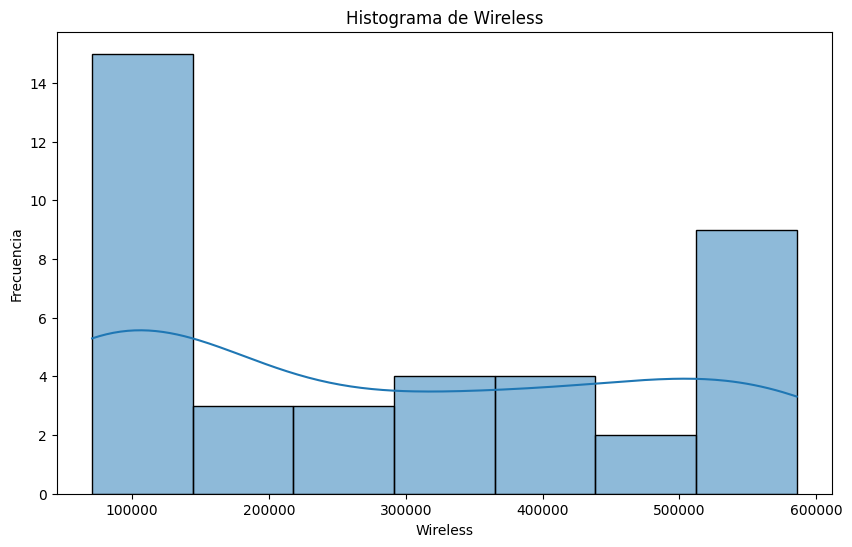

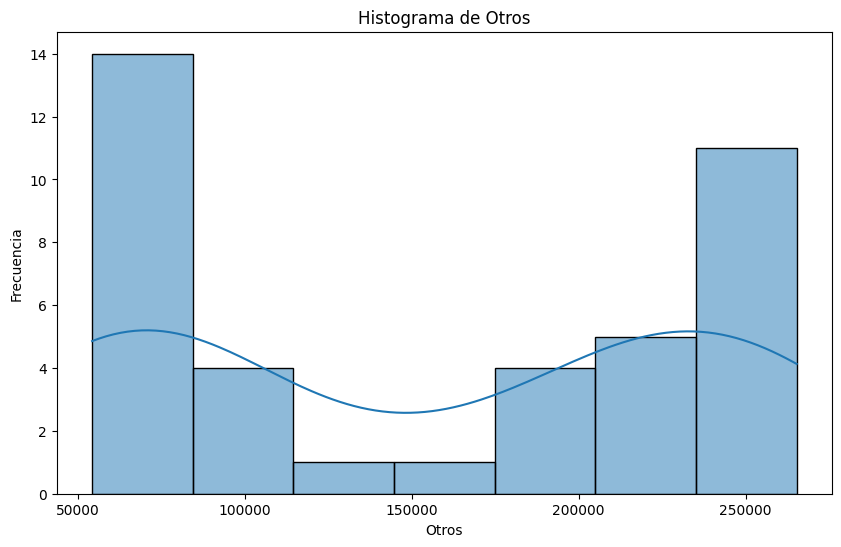

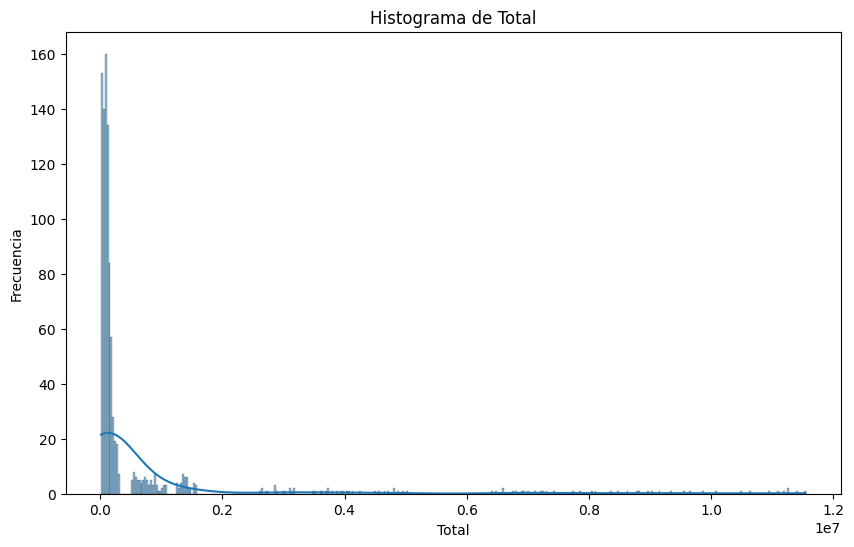

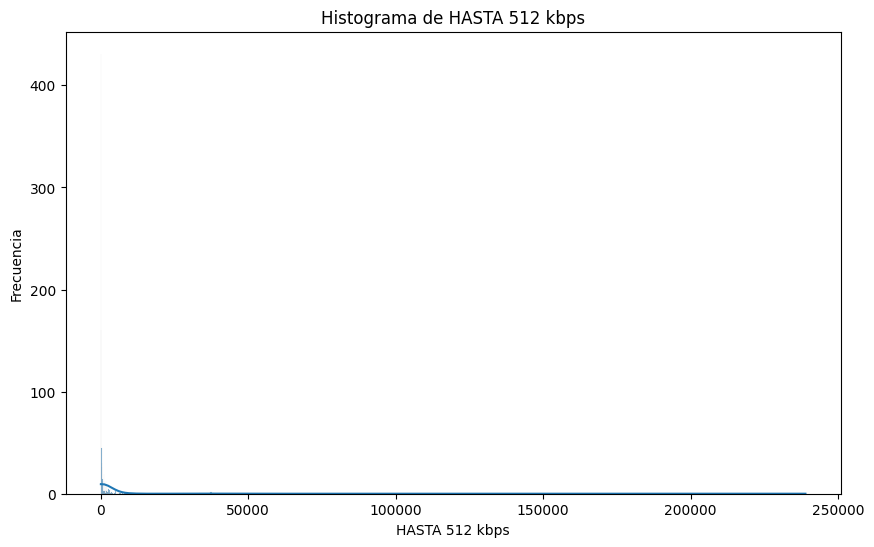

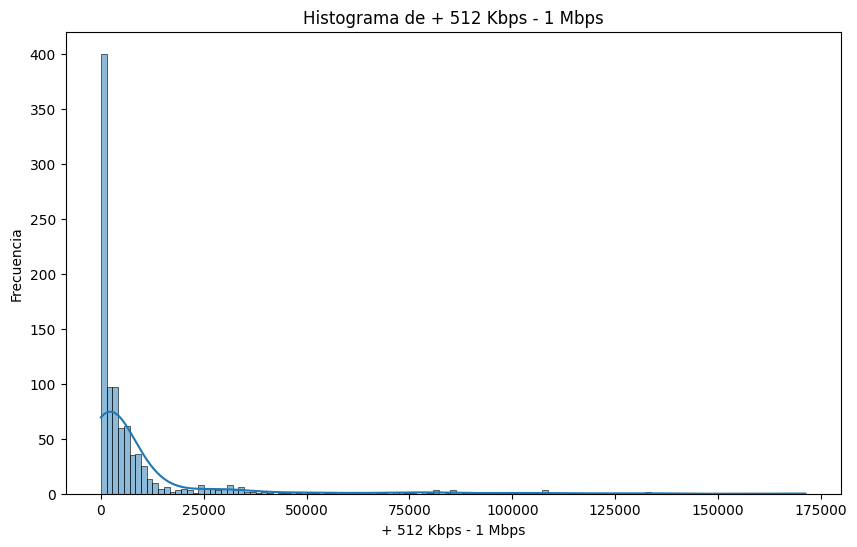

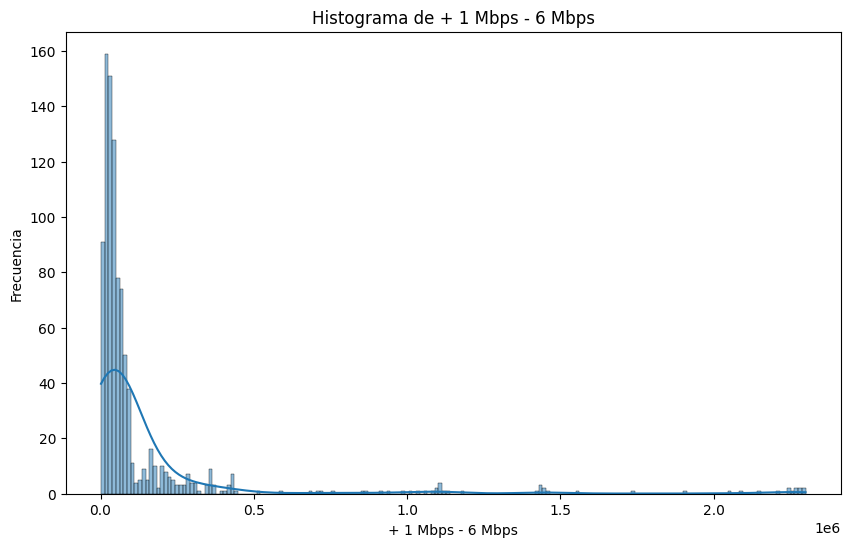

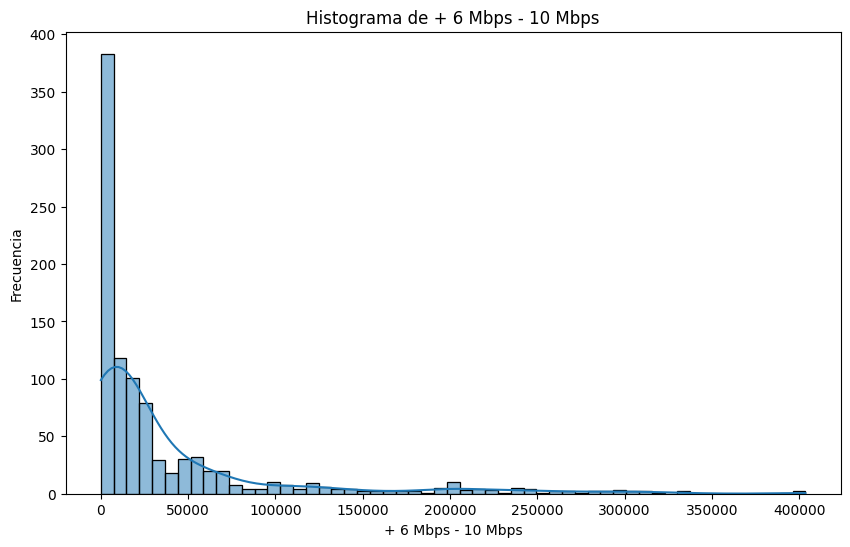

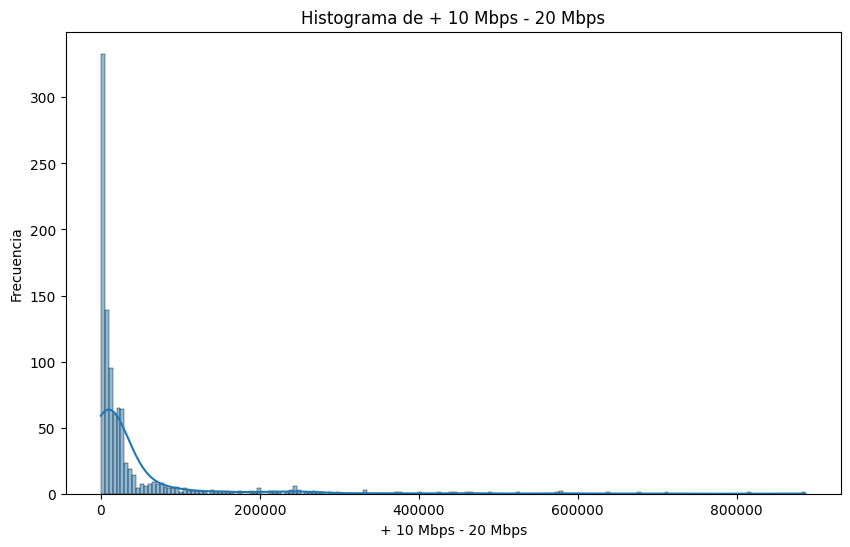

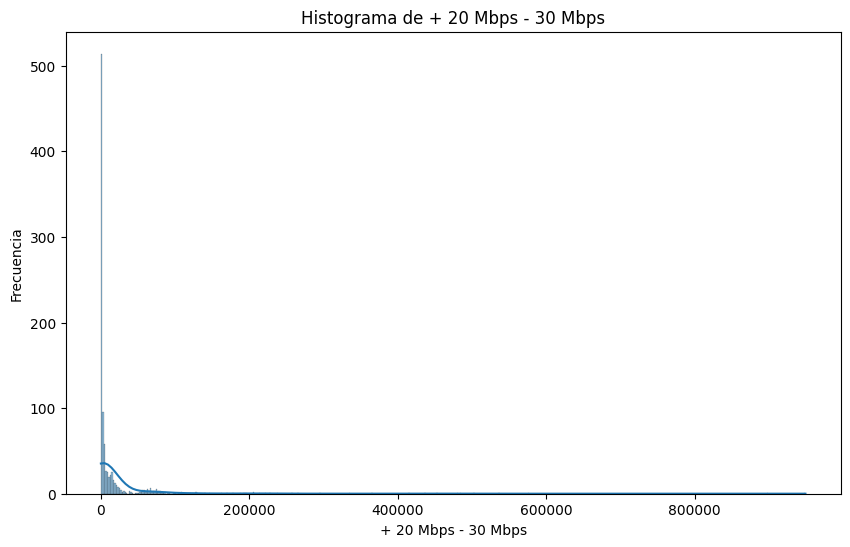

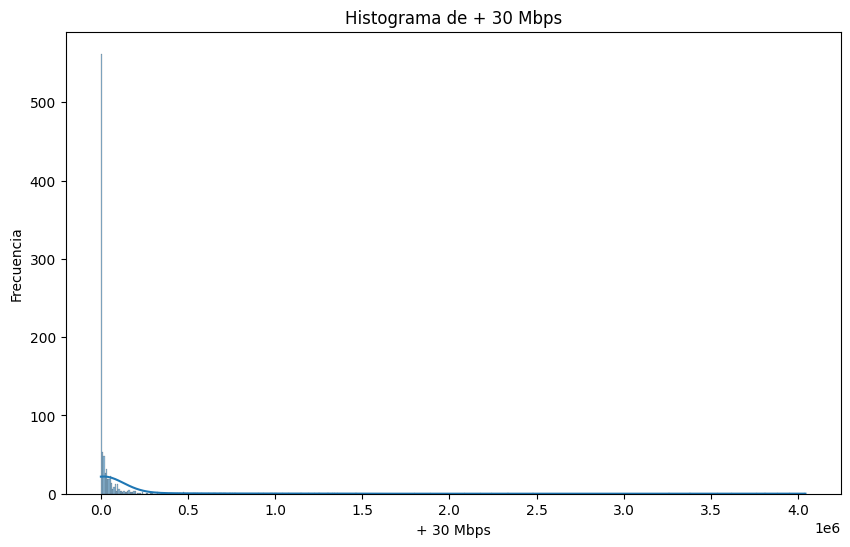

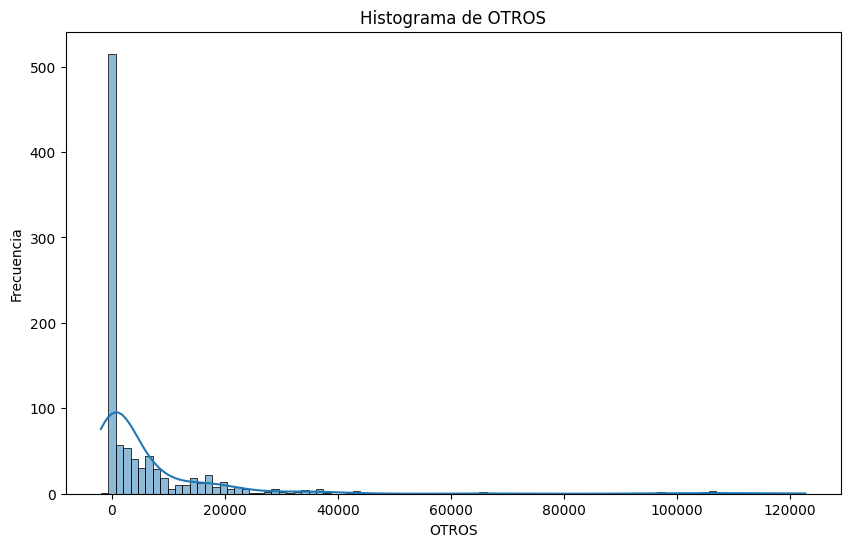

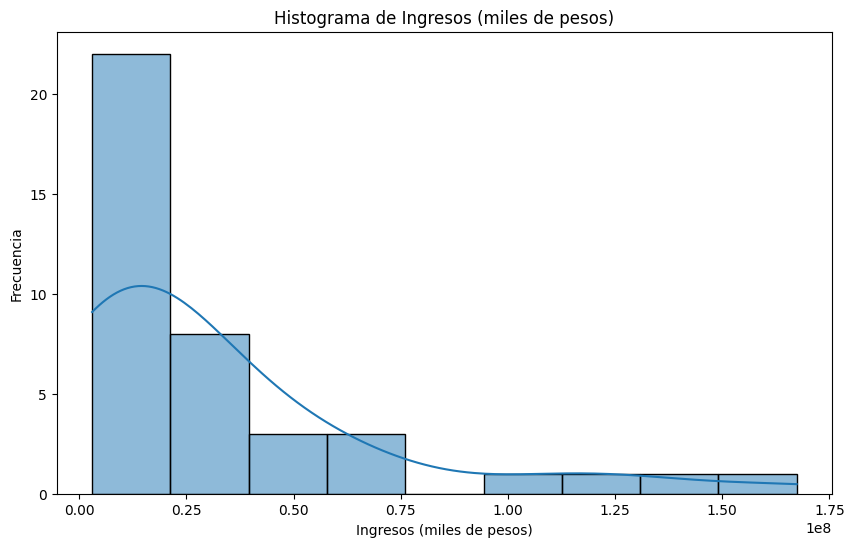

In [26]:
# Crear histogramas para las variables cuantitativas
for column in columnas_cuantitativas:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_consolidado[column], kde=True)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()


Variables cualitativas 

Se procede a eliminar etiqueta duplicadas en ciertas filas de variables cualitativas 

In [36]:
# Eliminar columnas duplicadas
df_consolidado = df_consolidado.loc[:, ~df_consolidado.columns.duplicated()]


In [37]:
print("Variables Cuantitativas:")
print(df_consolidado[columnas_cuantitativas].head())


Variables Cuantitativas:
    Año  Trimestre  Accesos por cada 100 hab  Accesos por cada 100 hogares  \
0  2023          4                     27.68                           NaN   
1  2023          4                     47.80                           NaN   
2  2023          4                     17.46                           NaN   
3  2023          4                     11.85                           NaN   
4  2023          4                     26.04                           NaN   

   ADSL  Cablemodem  Fibra óptica  Wireless  Otros  Total  HASTA 512 kbps  \
0   NaN         NaN           NaN       NaN    NaN    NaN             NaN   
1   NaN         NaN           NaN       NaN    NaN    NaN             NaN   
2   NaN         NaN           NaN       NaN    NaN    NaN             NaN   
3   NaN         NaN           NaN       NaN    NaN    NaN             NaN   
4   NaN         NaN           NaN       NaN    NaN    NaN             NaN   

   + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  

In [39]:
# Verificar si hay índices duplicados
duplicated_indices = df_consolidado.index.duplicated()

if duplicated_indices.any():
    print("Índices duplicados encontrados y eliminados.")
    df_consolidado = df_consolidado[~duplicated_indices]


Índices duplicados encontrados y eliminados.


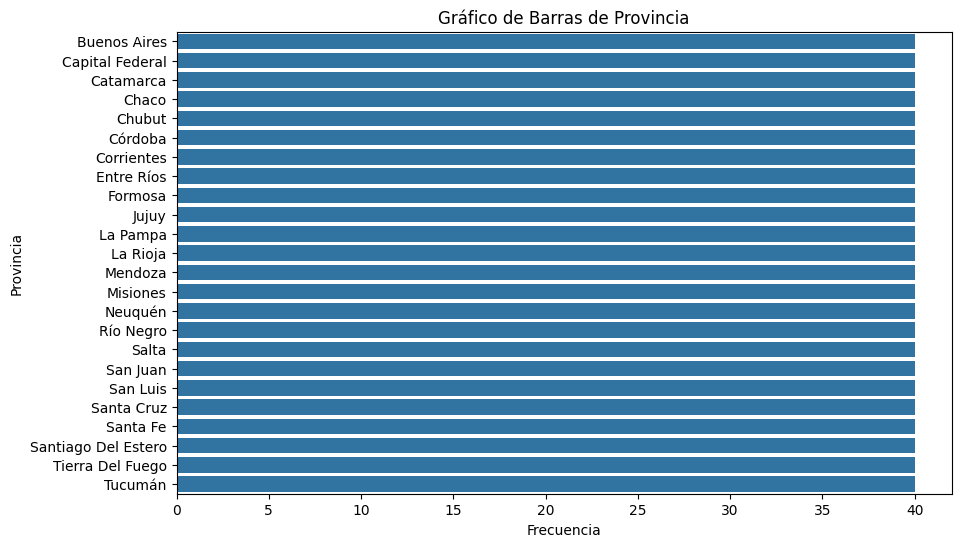

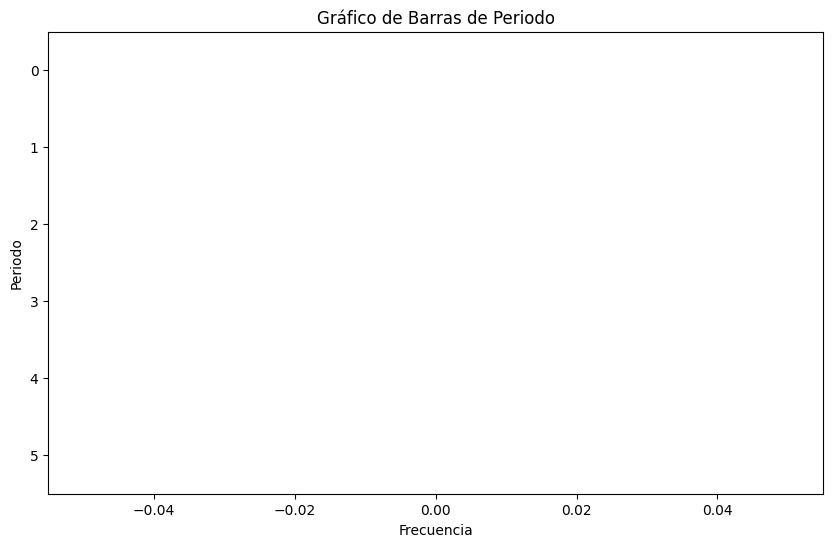

In [40]:
# Visualización de Variables Cualitativas usando Gráficos de Barras
for column in columnas_cualitativas:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_consolidado[column])
    plt.title(f'Gráfico de Barras de {column}')
    plt.xlabel('Frecuencia')
    plt.ylabel(column)
    plt.show()

Se guarda el dataframe en csv para ser trabajado en Power Bi

In [42]:
# Ruta del archivo CSV donde deseas guardar el DataFrame
ruta_archivo = 'C:/Users/walter/Desktop/Data_Analytics/Datasets/df_consolidado.csv'

# Guardar el DataFrame en un archivo CSV
df_consolidado.to_csv(ruta_archivo, index=False)

Conclusión:
El análisis revela una clara necesidad de mejorar la infraestructura y calidad del servicio de internet en Argentina que debe enfocarse en cerrar la  brecha digital entre áreas urbanas y rurales. La expansión de tecnologías avanzadas y campañas serán cruciales para aumentar la penetración y mejorar la experiencia del usuario. 